In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Lasso,SGDClassifier,Ridge,BayesianRidge,ElasticNet
from sklearn.metrics import accuracy_score,mean_squared_error
from xgboost import XGBClassifier
import optuna

/home/sonya/Documents/projet_perso/diabetes_diseases/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("archive/diabetes (1).csv")
df.sample(9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
557,8,110,76,0,0,27.8,0.237,58,0
699,4,118,70,0,0,44.5,0.904,26,0
717,10,94,72,18,0,23.1,0.595,56,0
258,1,193,50,16,375,25.9,0.655,24,0
756,7,137,90,41,0,32.0,0.391,39,0
120,0,162,76,56,100,53.2,0.759,25,1
741,3,102,44,20,94,30.8,0.400,26,0
694,2,90,60,0,0,23.5,0.191,25,0
429,1,95,82,25,180,35.0,0.233,43,1


In [3]:
len(df)

768

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


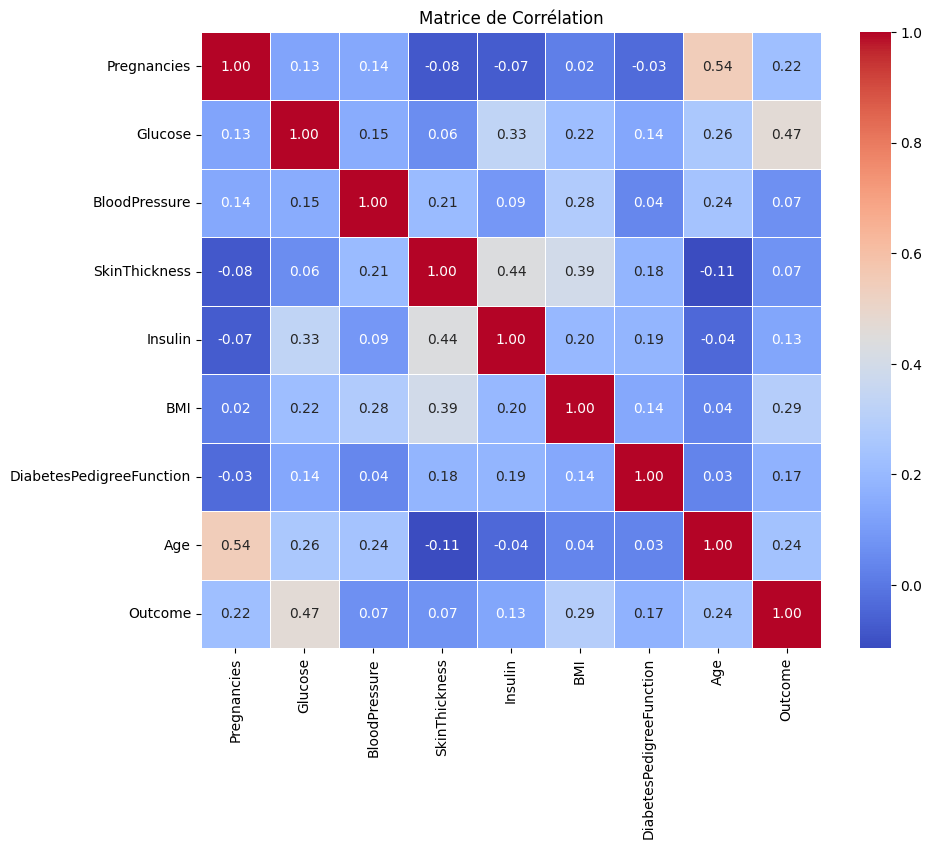

In [10]:
# Créer une heatmap avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [15]:
def test_model(model):
    model.fit(X_train_normalized,y_train)
    y_pred = model.predict(X_test_normalized)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

In [16]:
test_model(LogisticRegression())


0.7532467532467533

In [17]:
test_model(SGDClassifier())

0.6753246753246753

In [18]:
test_model(XGBClassifier())

0.7077922077922078

In [19]:
def objective(trial):
    # Paramètres à optimiser
    penalty = trial.suggest_categorical('penalty', ['l2'])
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    tol = trial.suggest_loguniform('tol', 1e-5, 1e-1)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    multi_class = trial.suggest_categorical('multi_class', ['auto', 'ovr'])
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0) if penalty == 'elasticnet' else None


    # Créer le modèle avec les paramètres suggérés par Optuna
    model = LogisticRegression(penalty=penalty, 
                               C=C, 
                               solver=solver, 
                               max_iter=max_iter, 
                               tol=tol, 
                               class_weight=class_weight, 
                               multi_class=multi_class, 
                               l1_ratio=l1_ratio, 
                               random_state=42)
    
    # Entraînement du modèle
    model.fit(X_train_normalized, y_train)
    
    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_test_normalized)
    
    # Calcul de l'exactitude
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Créer une étude Optuna et optimiser
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs paramètres et la meilleure exactitude trouvée
print('Meilleurs paramètres:', study.best_params)
print('Meilleure exactitude:', study.best_value)

[I 2024-07-03 17:55:00,614] A new study created in memory with name: no-name-549de641-c4c3-4e32-a37c-70431db91219
/tmp/ipykernel_576590/699241631.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)
/tmp/ipykernel_576590/699241631.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  tol = trial.suggest_loguniform('tol', 1e-5, 1e-1)
/home/sonya/Documents/projet_perso/diabetes_diseases/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid 

Meilleurs paramètres: {'penalty': 'l2', 'C': 0.013608576914151467, 'solver': 'saga', 'max_iter': 506, 'tol': 0.00020837752080039038, 'class_weight': None, 'multi_class': 'ovr'}
Meilleure exactitude: 0.7987012987012987
